# Tutorial 1: Introduction to Singular Spectrum Analysis

> [!NOTE]
> You can run this notebook on a Colab Interactive Server: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ADSCIAN/vassal/notebooks/01_basic_ssa_introduction.ipynb)

Singular Spectrum Analysis (SSA) is an effective nonparametric method for time series decomposition.

## Use Cases
SSA can be used to:
1. Separate deterministic components from noise within a time series;
2. Fill gaps in the time series using deterministic components;
3. Assess the significance of individual components.

This tutorial will primarily focus on separating deterministic components from noise (case 1).

## Drawbacks
Despite being a great decomposition tool, SSA has some drawbacks:
- SSA can be computationally intensive for large time series;
- SSA is an exploratory, empirical method that requires substantial user oversight;
- SSA is sensitive to the length of the time series as well as to outliers and skewness.

## Basic Principles
The primary concept in SSA involves creating a trajectory matrix using successive time series lags, followed by decomposition using Singular Value Decomposition (SVD). SVD is a linear matrix decomposition technique, similar to Principal Component Analysis (PCA), that extracts orthogonal components (vectors) ordered by descending variance (singular values).

Components with similar patterns can be grouped together to form coherent groups. Groups are then reconstructed into a matrix and converted back into a clean time series signal by averaging along the diagonals of the reconstructed trajectory matrix.

And there you have it! Let's dive into these concepts in more detail and see them in action!

## Import Modules


We import `matplotlib` for plotting, and from the `vassal` module, we import the 
`SingularSpectrumAnalysis` class, renaming it to `SSA` for brevity. We also import 
the `load_sst` function to access an included dataset of Sea Surface Temperature (SST).


In [3]:
# pip install git+https://github.com/ADSCIAN/vassal.git # <-- Uncomment to install if needed
import matplotlib as mpl
import matplotlib.pyplot as plt

from vassal import SingularSpectrumAnalysis as SSA
from vassal.datasets import load_sst

# Styling preferences
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['legend.frameon'] = False

## Data

We access the documentation of the `load_sst` function with the built-in `help` method,
and we run the function to retrieve a time series `ts` as a [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) object. 
The data contain 504 monthly mean observations of sea surface temperature in °C from 1982-01-01 
to 2023-12-31.
We plot the data using the series [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) method. 

Help on function load_sst in module vassal.datasets.data_loader:

load_sst() -> pandas.core.series.Series
    Load Sea Surface Temperature datasets return it as a pandas Series.
    
    The Sea Surface Temperature (SST) datasets contains monthly mean sea
    surface temperature in °C, from 1982-01-01 to 2023-12-31 globally between
    60° North and South, provided by the Climate Change Institute of University
    of Maine under a CC-BY license.
    
    Returns
    -------
    sst : pd.Series
        A pandas Series containing monthly mean total sunspot number from
        1749-01 to 2023-12, indexed using a pandas.DatetimeIndex.
    
    References
    ----------
    Climate Reanalyzer (n.d.). Monthly Sea Surface Temperature. Climate Change
    Institute, University of Maine. Retrieved June 06, 2024,
    from https://climatereanalyzer.org/
    
    Examples
    --------
    
    >>> from vassal.datasets import load_sst
    >>> sst = load_sst()
    >>> sst.head()
    Date
    1982-01-

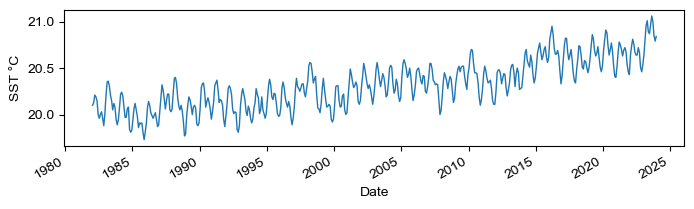

In [5]:
help(load_sst)
ts = load_sst()
ax = ts.plot(figsize=(8, 2), ylabel='SST °C', lw=1.)


## SSA Initialization

We now have the `ts` time series we aim to decompose. For assistance, we print the help of the `SSA` class,
and we instantiate the class with the `ts` time series object, keeping the other arguments as default.

After the initialization, the matrix to be decomposed has been constructed by default using the Broomhead &
King (1986) ('BK')approach relying on the default `window` parameter being approximately equal to the half-length 
(i.e., `len(ts)//2`) of the time series.

The 'BK' trajector matrix $\mathbf{X}$ is mathematically constructed based on a time series $X_t = \{x_1, x_2, \dots, x_N\}$ 
and the `window` parameter $L$ such that it has a dimension $L \times K$.
$$
\mathbf{X} = \begin{bmatrix} 
    x_1 & x_2 & x_3 & \dots & x_K \\
    x_2 & x_3 & x_4 & \dots & x_{K+1} \\
    x_3 & x_4 & x_5 & \dots & x_{K+2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_L &  x_{L+1} & x_{L+2} & \dots & x_{N} 
    \end{bmatrix}
$$

After the initialization, we can access the trajectory matrix to be decomposed with the `svd_matrix` attributed.
We can also plot it with the `plot` method and the `kind` argument set to 'matrix'.



Help on class SingularSpectrumAnalysis in module vassal.ssa:

class SingularSpectrumAnalysis(vassal.svd.SVDHandler, vassal.plotting.PlotSSA)
 |  SingularSpectrumAnalysis(timeseries: Sequence[float], window: int | None = None, svd_matrix: str = 'BK', svd_solver: str = 'np_svd', standardize: bool = True) -> None
 |  
 |  Singular Spectrum Analysis (SSA).
 |  
 |  Singular Spectrum Analysis (SSA) provides non-parametric linear
 |  decomposition of a time series relying on the Singular Value Decomposition
 |  (SVD) of a matrix constructed from the time series. The SVD decomposed
 |  matrix is either a lagged embedding, following the Broomhead and King (BK)
 |  trajectory matrix approach, or a Toeplitz lagged covariance matrix,
 |  following the Vautard and Ghil (VG) approach.
 |  
 |  Read more in the Notes and in the # TODO add ref to user guide.
 |  
 |  Parameters
 |  ----------
 |  timeseries : array-like
 |      The timeseries data as a one-dimensional array-like sequence of
 |      f

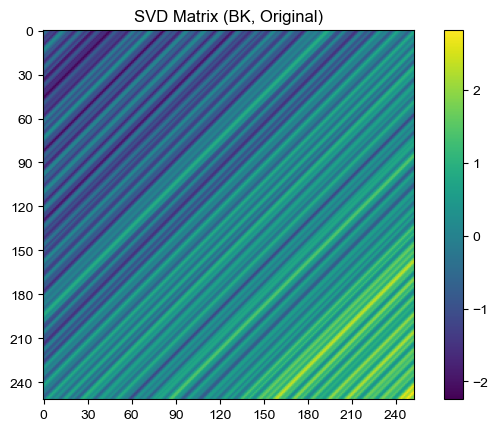

In [12]:
help(SSA)
ssa = SSA(ts)
print(ssa.svd_matrix.shape)
fig, ax = ssa.plot(kind='matrix')